<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r4_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-1-r4.csv?token=AKVFSOE5TRYEHQB5LGEPJO263INLO')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-normal-n-0-15-r4.csv?token=AKVFSOCRF7VQ65UPET5B2NS63INMS')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,88,3,2,4,1,1,5,17,23,7,0,0,1,4,3,0.75,16,64,1,64,64,6,4,20,340,1
1,89,3,2,4,2,2,5,17,23,7,0,0,1,4,3,0.75,17,63,2,64,126,6,16,20,340,1
2,90,3,2,4,3,2,5,17,23,7,0,0,1,4,3,0.75,18,62,3,64,186,6,24,20,340,1
3,91,3,2,4,4,2,5,17,23,7,0,0,1,4,3,0.75,19,61,4,64,244,6,32,20,340,1
4,95,3,2,4,5,3,5,17,23,7,0,0,1,4,3,0.75,23,60,5,64,300,6,60,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176071,3276593,2,0,4,2,2,5,19,20,4,15,15,30092,5,0,0.00,5,5,20,24,100,0,481472,20,380,0
176072,3276594,2,0,4,3,2,5,19,20,4,15,15,30092,5,0,0.00,6,4,21,24,84,0,722208,20,380,0
176073,3276595,2,0,4,4,2,5,19,20,4,15,15,30092,5,0,0.00,7,3,22,24,66,0,962944,20,380,0
176074,3276596,2,0,3,1,4,3,10,20,4,18,2,30092,3,0,0.00,8,2,23,24,46,0,361104,9,90,0


In [6]:
df.shape

(176076, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-11-r4.csv?token=AKVFSOGGFTANMBL73NT4MQS63INLS')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-12-r4.csv?token=AKVFSOELY7EYPZC6QZRXOJ263INYG')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r4/2-fft-malicious-n-0-15-m-7-r4.csv?token=AKVFSOA7ZSSOS55SHOQWE4K63INYK')


In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(100063, 26)
(108174, 26)
(103449, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.743947,-0.266978,0.025306,-0.039495,0.725995,0.718066,-0.001196,0.126224,-0.246447,-0.587110,-0.544981,-0.064966,0.022472,-0.033156,-0.042389,0.523642,-0.089432,0.405298,0.687204,0.075436
inport,-0.743947,1.000000,0.297259,0.004733,-0.007386,-0.600735,-0.675518,0.030362,-0.096572,0.541208,0.861687,0.643315,0.054678,-0.070610,-0.012431,-0.011085,0.100265,0.107686,-0.267532,-0.599387,-0.023016
cache_coherence_type,-0.266978,0.297259,1.000000,0.204729,-0.319511,-0.364221,-0.407833,0.024828,-0.020255,0.188664,0.292931,0.069677,0.036165,-0.045847,-0.007555,-0.006800,-0.066899,0.277242,0.566235,-0.075322,-0.002837
flit_id,0.025306,0.004733,0.204729,1.000000,0.049164,0.214074,0.181884,0.001071,0.006035,0.000112,-0.001236,0.276244,-0.034464,0.026887,-0.005912,-0.005369,0.025586,0.622566,0.371382,0.286587,0.001970
flit_type,-0.039495,-0.007386,-0.319511,0.049164,1.000000,-0.334095,-0.283858,-0.001671,-0.009418,-0.000176,0.001929,0.323245,-0.025368,0.037997,0.009854,0.009250,-0.039930,0.174984,-0.579598,-0.447263,-0.003075
vnet,0.725995,-0.600735,-0.364221,0.214074,-0.334095,1.000000,0.974601,-0.031256,0.085963,-0.279227,-0.485998,-0.535636,-0.074092,0.021174,-0.041289,-0.044413,0.304871,-0.072994,0.561394,0.945632,0.043045
vc,0.718066,-0.675518,-0.407833,0.181884,-0.283858,0.974601,1.000000,-0.035011,0.058207,-0.376955,-0.588482,-0.570264,-0.071758,0.036216,-0.027732,-0.029457,0.200398,-0.090787,0.500161,0.936788,0.031993
traversal_id,-0.001196,0.030362,0.024828,0.001071,-0.001671,-0.031256,-0.035011,1.000000,0.001137,0.015335,0.018390,0.029309,0.101513,0.102508,0.159188,0.100401,0.050456,0.565190,-0.005601,-0.028192,-0.297799
hop_count,0.126224,-0.096572,-0.020255,0.006035,-0.009418,0.085963,0.058207,0.001137,1.000000,0.524115,0.097775,0.214070,-0.017161,-0.001719,-0.014731,-0.015809,0.293391,-0.010592,0.058083,0.067069,0.046857
current_hop,-0.246447,0.541208,0.188664,0.000112,-0.000176,-0.279227,-0.376955,0.015335,0.524115,1.000000,0.802595,0.669255,0.033866,-0.070151,-0.028311,-0.031969,0.353017,0.054065,-0.079482,-0.305240,0.034151


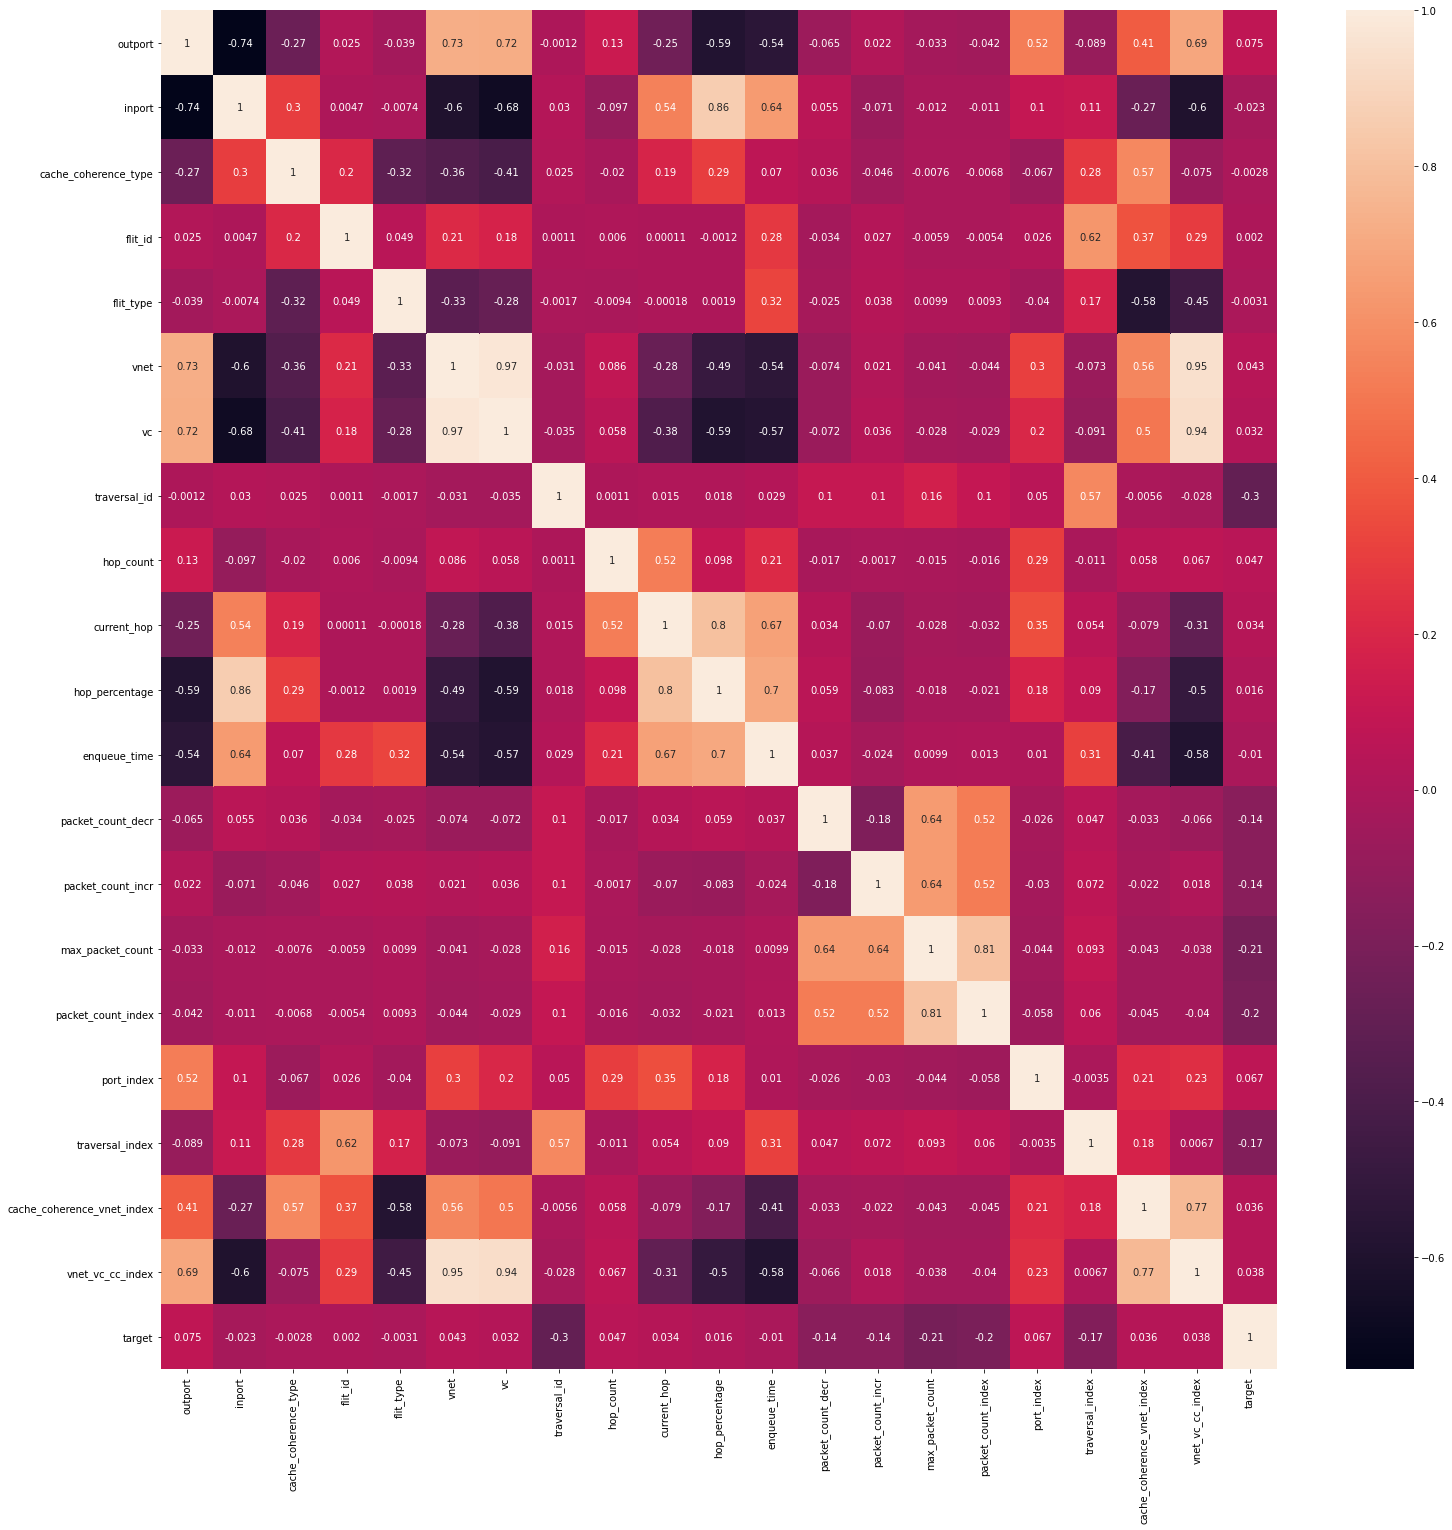

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

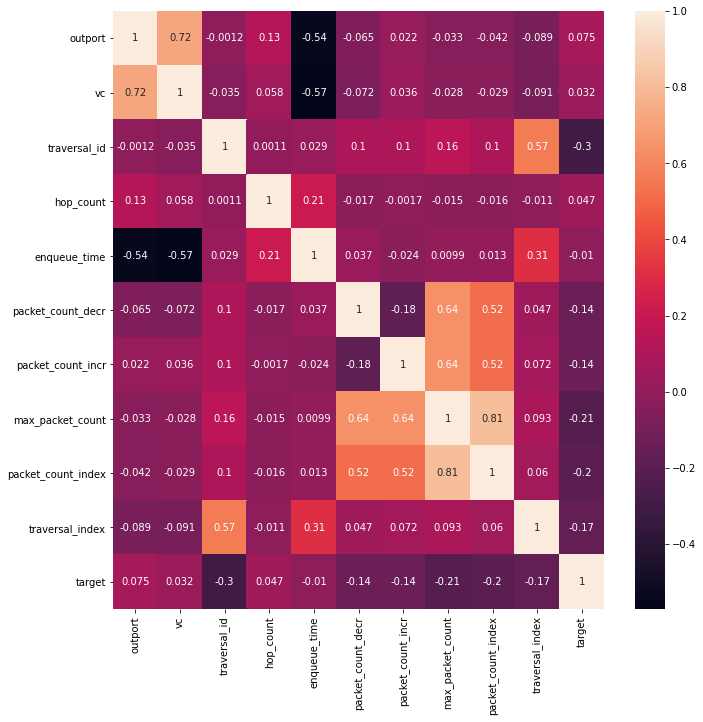

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

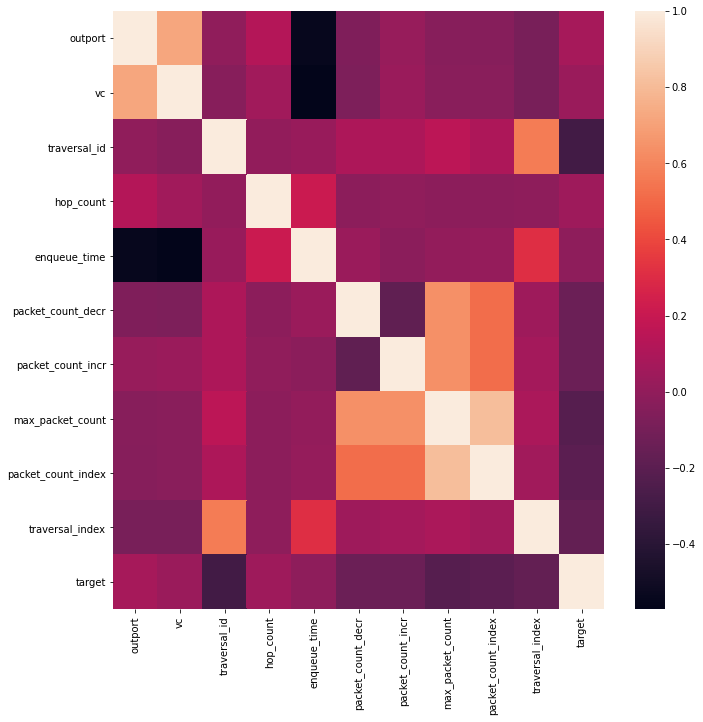

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.727273,0.0,0.6,0.166667,0.350000,0.000000,0.350000,0.007609,0.000000
1,1.000000,0.727273,0.0,0.6,0.180556,0.344444,0.005556,0.350000,0.015097,0.000004
2,1.000000,0.727273,0.0,0.6,0.194444,0.338889,0.011111,0.350000,0.022343,0.000007
3,1.000000,0.727273,0.0,0.6,0.208333,0.333333,0.016667,0.350000,0.029348,0.000010
4,1.000000,0.727273,0.0,0.6,0.263889,0.327778,0.022222,0.350000,0.036111,0.000021
...,...,...,...,...,...,...,...,...,...,...
176071,0.666667,0.909091,1.0,0.8,0.013889,0.022222,0.105556,0.127778,0.011957,0.177782
176072,0.666667,0.909091,1.0,0.8,0.027778,0.016667,0.111111,0.127778,0.010024,0.266674
176073,0.666667,0.909091,1.0,0.8,0.041667,0.011111,0.116667,0.127778,0.007850,0.355566
176074,0.666667,0.090909,1.0,0.4,0.055556,0.005556,0.122222,0.127778,0.005435,0.133336


In [20]:
train_X[train_X.duplicated()].shape

(12, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.727273,0.0,0.6,0.166667,0.430168,0.000000,0.430168,0.009403,0.000000
1,1.000000,0.727273,0.0,0.6,0.180556,0.424581,0.005587,0.430168,0.018684,0.000004
2,1.000000,0.727273,0.0,0.6,0.194444,0.418994,0.011173,0.430168,0.027720,0.000007
3,1.000000,0.727273,0.0,0.6,0.208333,0.413408,0.016760,0.430168,0.036512,0.000010
4,1.000000,0.727273,0.0,0.6,0.263889,0.407821,0.022346,0.430168,0.045060,0.000021
...,...,...,...,...,...,...,...,...,...,...
100058,0.666667,0.909091,1.0,0.8,0.013889,0.022346,0.039106,0.061453,0.004762,0.177782
100059,0.666667,0.909091,1.0,0.8,0.027778,0.016760,0.044693,0.061453,0.004274,0.266674
100060,0.666667,0.909091,1.0,0.8,0.041667,0.011173,0.050279,0.061453,0.003541,0.355566
100061,0.666667,0.090909,1.0,0.4,0.055556,0.005587,0.055866,0.061453,0.002564,0.133336


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    101735
1     74341
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1765.461327
8  packet_count_index   653.906117
9     traversal_index   587.470416
7    max_packet_count   575.605643
5   packet_count_decr   292.471758
6   packet_count_incr   283.173459
0             outport   207.780895
3           hop_count    52.967547
1                  vc    43.045365
4        enqueue_time     1.525630


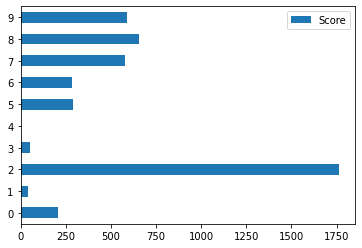

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.63244892769349
Test Prediction Score 96.76453378308608


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 79.52290057263923
Test Prediction Score 79.07907630299333
Test Prediction Score 80.28400467863392


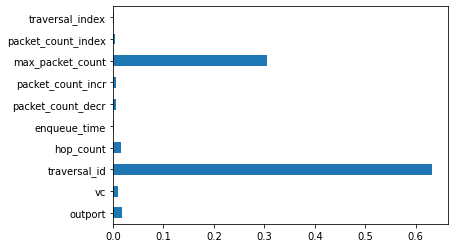

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

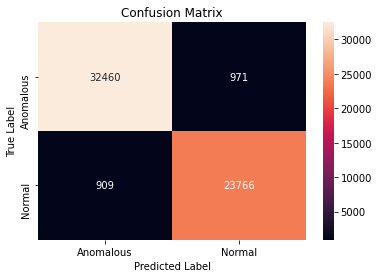

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33431
           1       0.96      0.96      0.96     24675

    accuracy                           0.97     58106
   macro avg       0.97      0.97      0.97     58106
weighted avg       0.97      0.97      0.97     58106



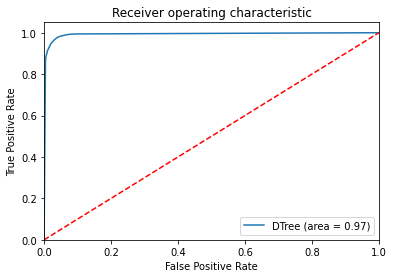

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r4l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99321861490209
Test Prediction Score 99.70398926100574


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 82.8268191039645
Test Prediction Score 81.45395381514967
Test Prediction Score 83.11148488627246


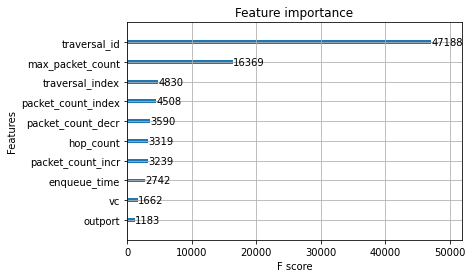

In [45]:
plot_importance(xgbc)
plt.show()

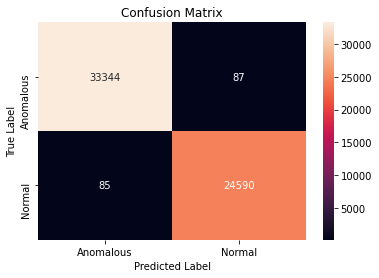

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33431
           1       1.00      1.00      1.00     24675

    accuracy                           1.00     58106
   macro avg       1.00      1.00      1.00     58106
weighted avg       1.00      1.00      1.00     58106



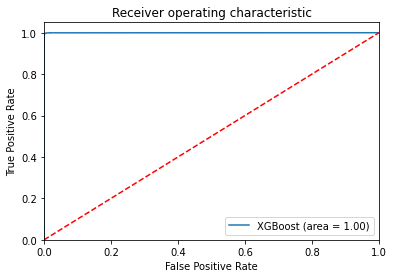

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()